In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pathlib import Path
DATA_DIR = Path('..')/'..'/'data'

# Loading data

In [2]:
house_polls = pd.read_pickle(DATA_DIR/'cleaned'/'HousePollwithWinner_Final.pkl')

In [8]:
house_polls.head()

,race_name,race_type,state,top_candidates,pollster,poll_results,poll_leader,poll_spread,date,winner,winning_party,election_date,district
0,pennsylvania 12th district special election,house,PA,"[burns, critz]",ppp (d),"{'burns': 44.0, 'critz': 41.0}",burns,3.0,2010-04-20,critz,d,2010-11-02 00:00:00,12
1,new hampshire 1st district,house,NH,"[guinta, shea-porter]",ppp (d),"{'guinta': 46.0, 'shea-porter': 45.0}",guinta,1.0,2010-04-22,guinta,r,2010-11-02 00:00:00,1
2,new hampshire 2nd district,house,NH,"[bass, swett]",ppp (d),"{'bass': 47.0, 'swett': 32.0}",bass,15.0,2010-04-22,bass,r,2010-11-02 00:00:00,2
3,new hampshire 1st district,house,NH,"[guinta, shea-porter]",wmur/unh,"{'guinta': 42.0, 'shea-porter': 38.0}",guinta,4.0,2010-04-30,guinta,r,2010-11-02 00:00:00,1
4,new hampshire 2nd district,house,NH,"[bass, swett]",wmur/unh,"{'bass': 44.0, 'swett': 27.0}",bass,17.0,2010-04-30,bass,r,2010-11-02 00:00:00,2


In [3]:
house_polls.iloc[400:500, :]

,race_name,race_type,state,top_candidates,pollster,poll_results,poll_leader,poll_spread,date,winner,winning_party,election_date,district
400,maine 2nd district,house,ME,"[poliquin, cain]",colby college/surveyusa,"{'poliquin': 50.0, 'cain': 45.0}",poliquin,5.0,2016-09-14,poliquin,r,2016-11-08 00:00:00,2
401,maine 1st district,house,ME,"[pingree, holbrook]",press herald/unh,"{'pingree': 64.0, 'holbrook': 22.0}",pingree,42.0,2016-09-25,pingree,d,2016-11-08 00:00:00,1
402,maine 2nd district,house,ME,"[poliquin, cain]",press herald/unh,"{'poliquin': 45.0, 'cain': 35.0}",poliquin,10.0,2016-09-25,poliquin,r,2016-11-08 00:00:00,2
403,iowa 1st district,house,IA,"[blum, vernon]",loras,"{'blum': 45.0, 'vernon': 38.0}",blum,7.0,2016-09-27,blum,r,2016-11-08 00:00:00,1
404,iowa 3rd district,house,IA,"[young, mowrer]",loras,"{'young': 46.0, 'mowrer': 36.0}",young,10.0,2016-09-27,young,r,2016-11-08 00:00:00,3
405,new york 1st district,house,NY,"[zeldin, throne-holst]",newsday/siena,"{'zeldin': 53.0, 'throne-holst': 38.0}",zeldin,15.0,2016-10-08,zeldin,r,2016-11-08 00:00:00,1
406,new york 3rd district,house,NY,"[suozzi, martins]",newsday/siena,"{'suozzi': 50.0, 'martins': 34.0}",suozzi,16.0,2016-10-08,suozzi,d,2016-11-08 00:00:00,3
407,florida 13th district,house,FL,"[crist, jolly]",univ. of north florida,"{'crist': 54.0, 'jolly': 36.0}",crist,18.0,2016-10-13,crist,d,2016-11-08 00:00:00,13
408,minnesota 2nd district,house,MN,"[craig, lewis]",kstp/surveyusa,"{'craig': 46.0, 'lewis': 41.0}",craig,5.0,2016-10-17,lewis,r,2016-11-08 00:00:00,2
409,minnesota 3rd district,house,MN,"[paulsen, bonoff]",kstp/surveyusa,"{'paulsen': 49.0, 'bonoff': 38.0}",paulsen,11.0,2016-10-17,paulsen,r,2016-11-08 00:00:00,3


In [10]:
house_polls = house_polls.replace("<BLANK>", np.nan)

# Feature extraction

Initial exploration will only occur on house data, then replicated on other datasets (senate, governor).

## What percent of poll leaders become winners?

Starting from very simple features. 

In [6]:
def find_winning_pct(party=None):
    """Find winning percentage for a party, or if not specified, overall."""
    if not party:
        winning_pct = (house_polls['poll_leader'] == house_polls['winner']).mean()
    else:
        subset = house_polls[house_polls['winning_party'] == party]
        winning_pct = (subset['poll_leader'] == subset['winner']).mean()
    return round(winning_pct * 100, 2)

In [7]:
print(f"{find_winning_pct()}% of poll leaders become winners")

45.64% of poll leaders become winners


Does winning party play a role in this?

In [7]:
print(f"{find_winning_pct('r')}% of winning republicans had led the polls")

68.54% of winning republicans had led the polls


In [8]:
print(f"{find_winning_pct('d')}% of winning democrats had led the polls")

68.85% of winning democrats had led the polls


## Poll Spread

In [16]:
result_win = house_polls[house_polls['poll_leader'] == house_polls['winner']]
result_lose = house_polls[house_polls['poll_leader'] != house_polls['winner']]

In [17]:
pd.DataFrame({
    'result_win': result_win['poll_spread'].describe(),
    'result_lose': result_lose['poll_spread'].describe()
})

,result_win,result_lose
count,309.000000,340.000000
mean,9.025890,6.494118
std,6.747725,5.237990
min,1.000000,1.000000
25%,4.000000,3.000000
50%,7.000000,5.000000
75%,13.000000,9.000000
max,42.000000,28.000000


/mnt/c/Users/Junseo/Dropbox/4thYear/1Fall/ieor135/tenguins/.env/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/c/Users/Junseo/Dropbox/4thYear/1Fall/ieor135/tenguins/.env/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


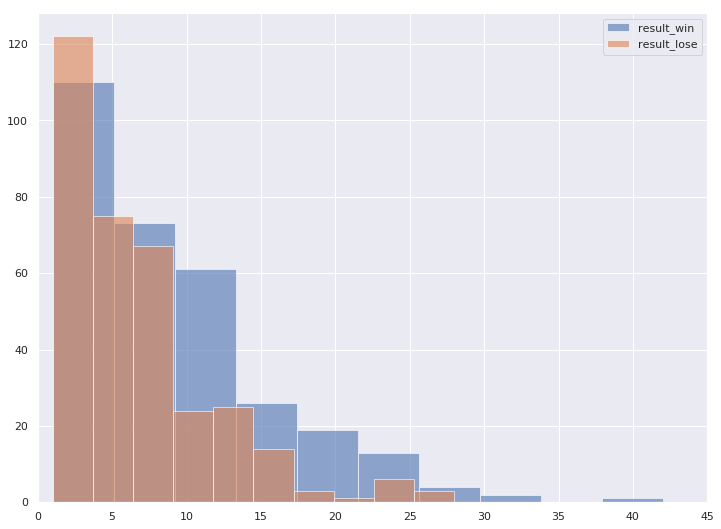

In [11]:
plt.figure(figsize=(12, 9))
plt.hist(result_win['poll_spread'], label='result_win', alpha=0.6)
plt.hist(result_lose['poll_spread'], label='result_lose', alpha=0.6)
plt.xlim(0, 45)
plt.legend();

Does this depend on party?

In [12]:
result_win_r = result_win[result_win['winning_party'] == 'r'] # republican led poll and won
result_win_d = result_win[result_win['winning_party'] == 'd'] # democrat led poll and won
result_win_nan = result_win[result_win['winning_party'].isnull()]

result_lose_r = result_lose[result_lose['winning_party'] == 'r'] # republican lost poll but won
result_lose_d = result_lose[result_lose['winning_party'] == 'd'] # democrat lost poll but won
result_lose_nan = result_lose[result_lose['winning_party'].isnull()]

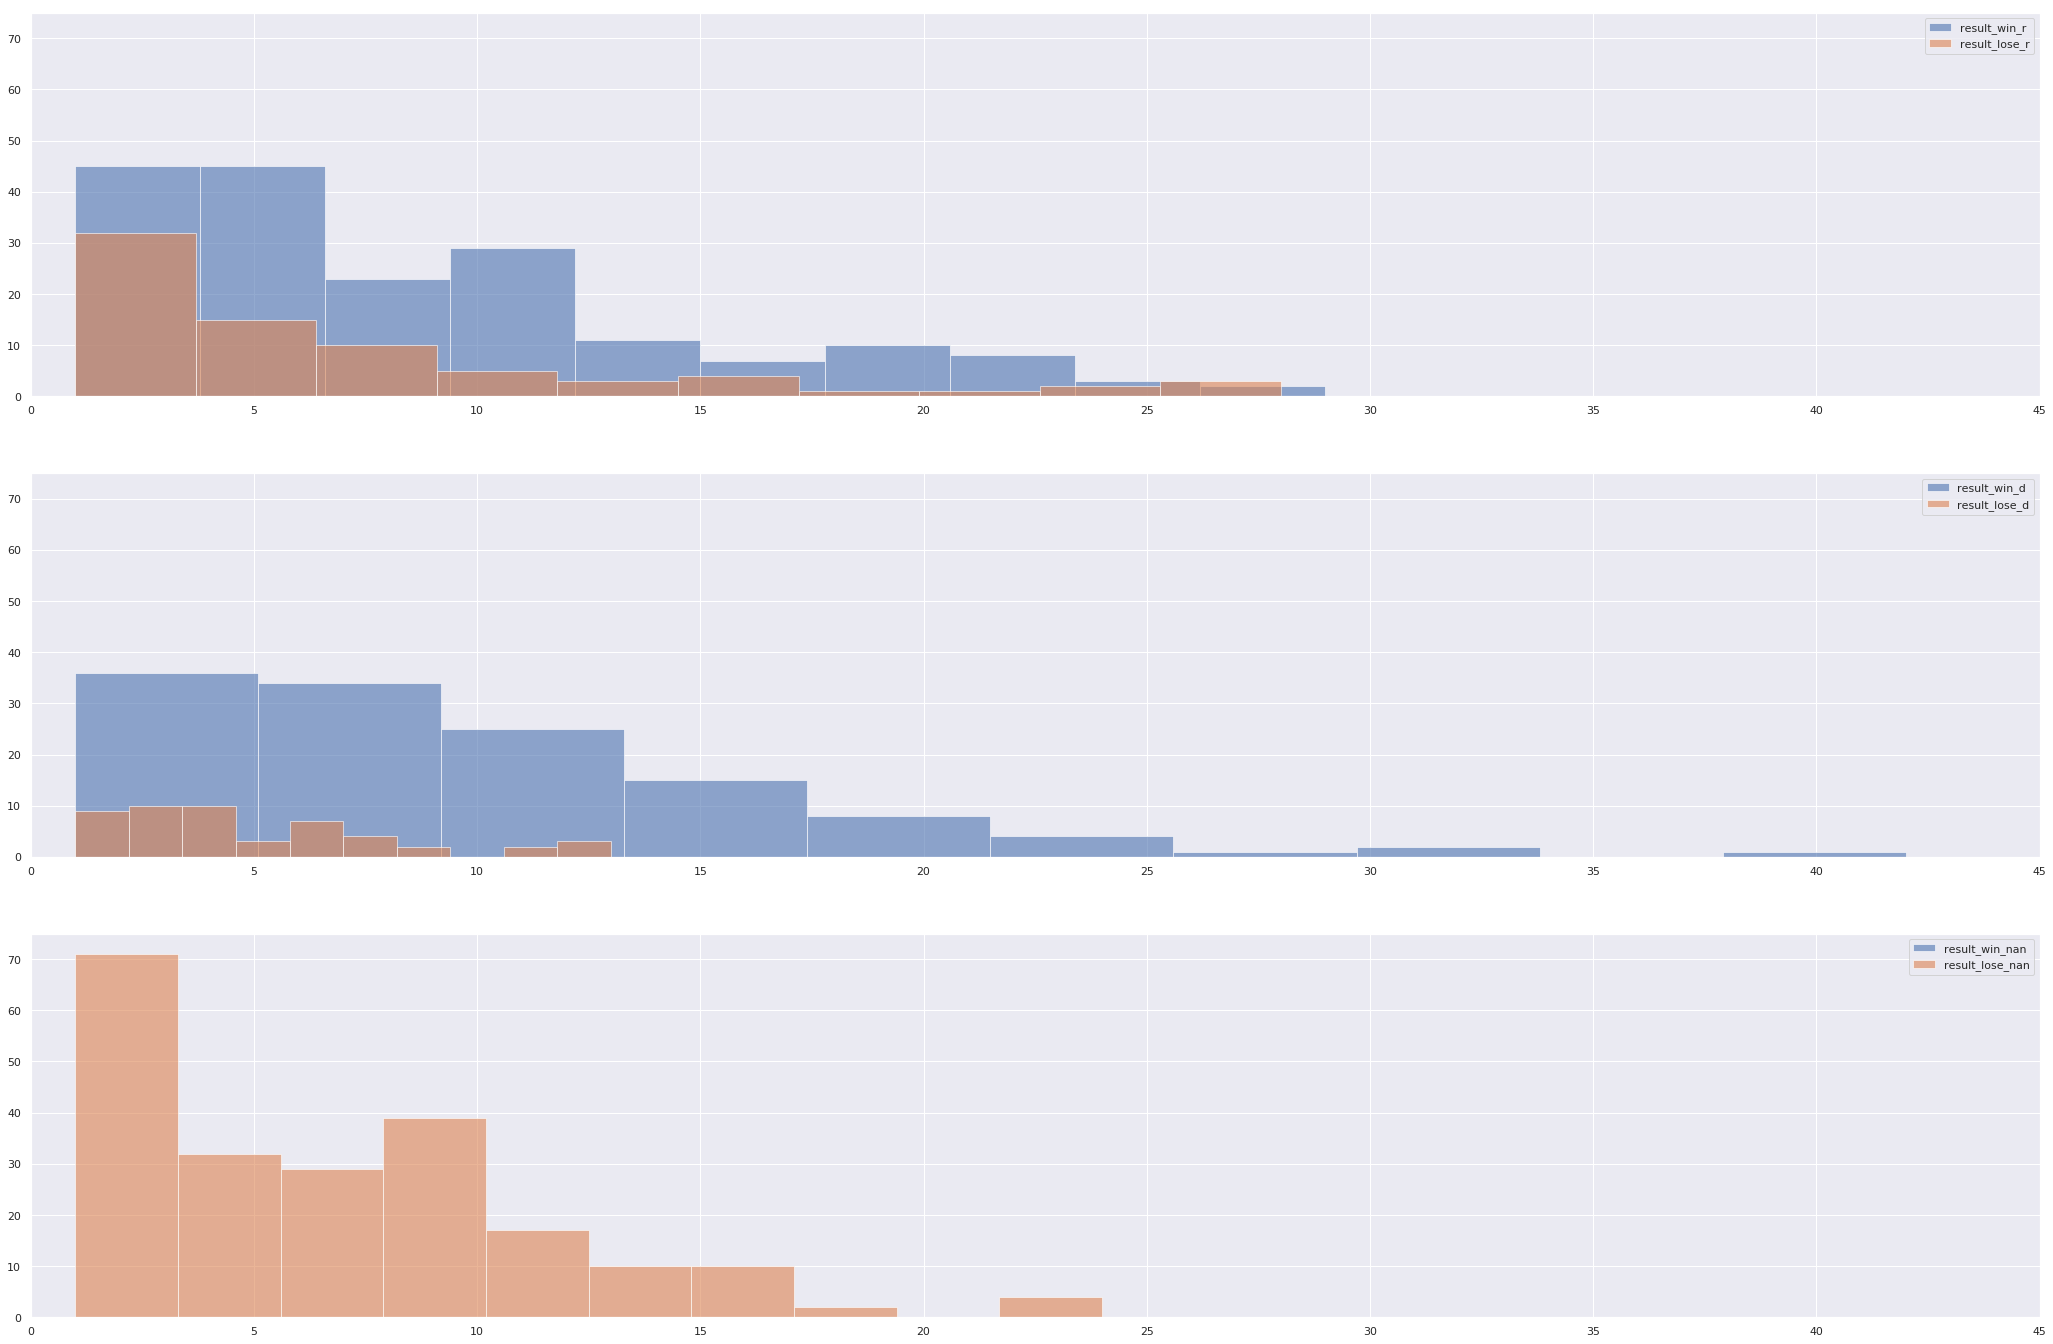

In [38]:
plt.figure(figsize=(36, 24))

plt.subplot(311)
plt.hist(result_win_r['poll_spread'], label='result_win_r', alpha=0.6) # republican led poll and won
plt.hist(result_lose_r['poll_spread'], label='result_lose_r', alpha=0.6) # republican lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 75)
plt.legend()

plt.subplot(312)
plt.hist(result_win_d['poll_spread'], label='result_win_d', alpha=0.6) # democrat led poll and won
plt.hist(result_lose_d['poll_spread'], label='result_lose_d', alpha=0.6) # democrat lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 75)
plt.legend()

plt.subplot(313)
plt.hist(result_win_nan['poll_spread'], label='result_win_nan', alpha=0.6)
plt.hist(result_lose_nan['poll_spread'], label='result_lose_nan', alpha=0.6)
plt.xlim(0, 45)
plt.ylim(0, 75)
plt.legend();


Fascinating. When the Democrats win (second graph), they are more likely to be leading the polls in convincing fashion (blue is spread when they are leading polls, while orange is spread when they are losing the polls). On the other hand, Republicans do not necessarily win in such convincing fashion (first graph; blue is spread when they are leading polls and win, orange is when they are losing polls and spread). We do have to be careful to jump too quickly to conclusions, however, as there are many missing values.

# Replication on Senate, Governor

In [43]:
senate_polls = pd.read_pickle(DATA_DIR/'cleaned'/'SenatePollwithWinner_Final.pkl')
governor_polls = pd.read_pickle(DATA_DIR/'cleaned'/'GovernorPollwithWinner_Final.pkl')

In [44]:
senate_win = senate_polls[senate_polls['poll_leader'] == senate_polls['winner']]
senate_lose = senate_polls[senate_polls['poll_leader'] != senate_polls['winner']]

governor_win = governor_polls[governor_polls['poll_leader'] == governor_polls['winner']]
governor_lose = governor_polls[governor_polls['poll_leader'] != governor_polls['winner']]

In [45]:
senate_win_r = senate_win[senate_win['winning_party'] == 'r'] # republican led poll and won
senate_win_d = senate_win[senate_win['winning_party'] == 'd'] # democrat led poll and won
senate_win_nan = senate_win[senate_win['winning_party'].isnull()]

senate_lose_r = senate_lose[senate_lose['winning_party'] == 'r'] # republican lost poll but won
senate_lose_d = senate_lose[senate_lose['winning_party'] == 'd'] # democrat lost poll but won
senate_lose_nan = senate_lose[senate_lose['winning_party'].isnull()]

In [46]:
governor_win_r = governor_win[governor_win['winning_party'] == 'r'] # republican led poll and won
governor_win_d = governor_win[governor_win['winning_party'] == 'd'] # democrat led poll and won
governor_win_nan = governor_win[governor_win['winning_party'].isnull()]

governor_lose_r = governor_lose[governor_lose['winning_party'] == 'r'] # republican lost poll but won
governor_lose_d = governor_lose[governor_lose['winning_party'] == 'd'] # democrat lost poll but won
governor_lose_nan = governor_lose[governor_lose['winning_party'].isnull()]

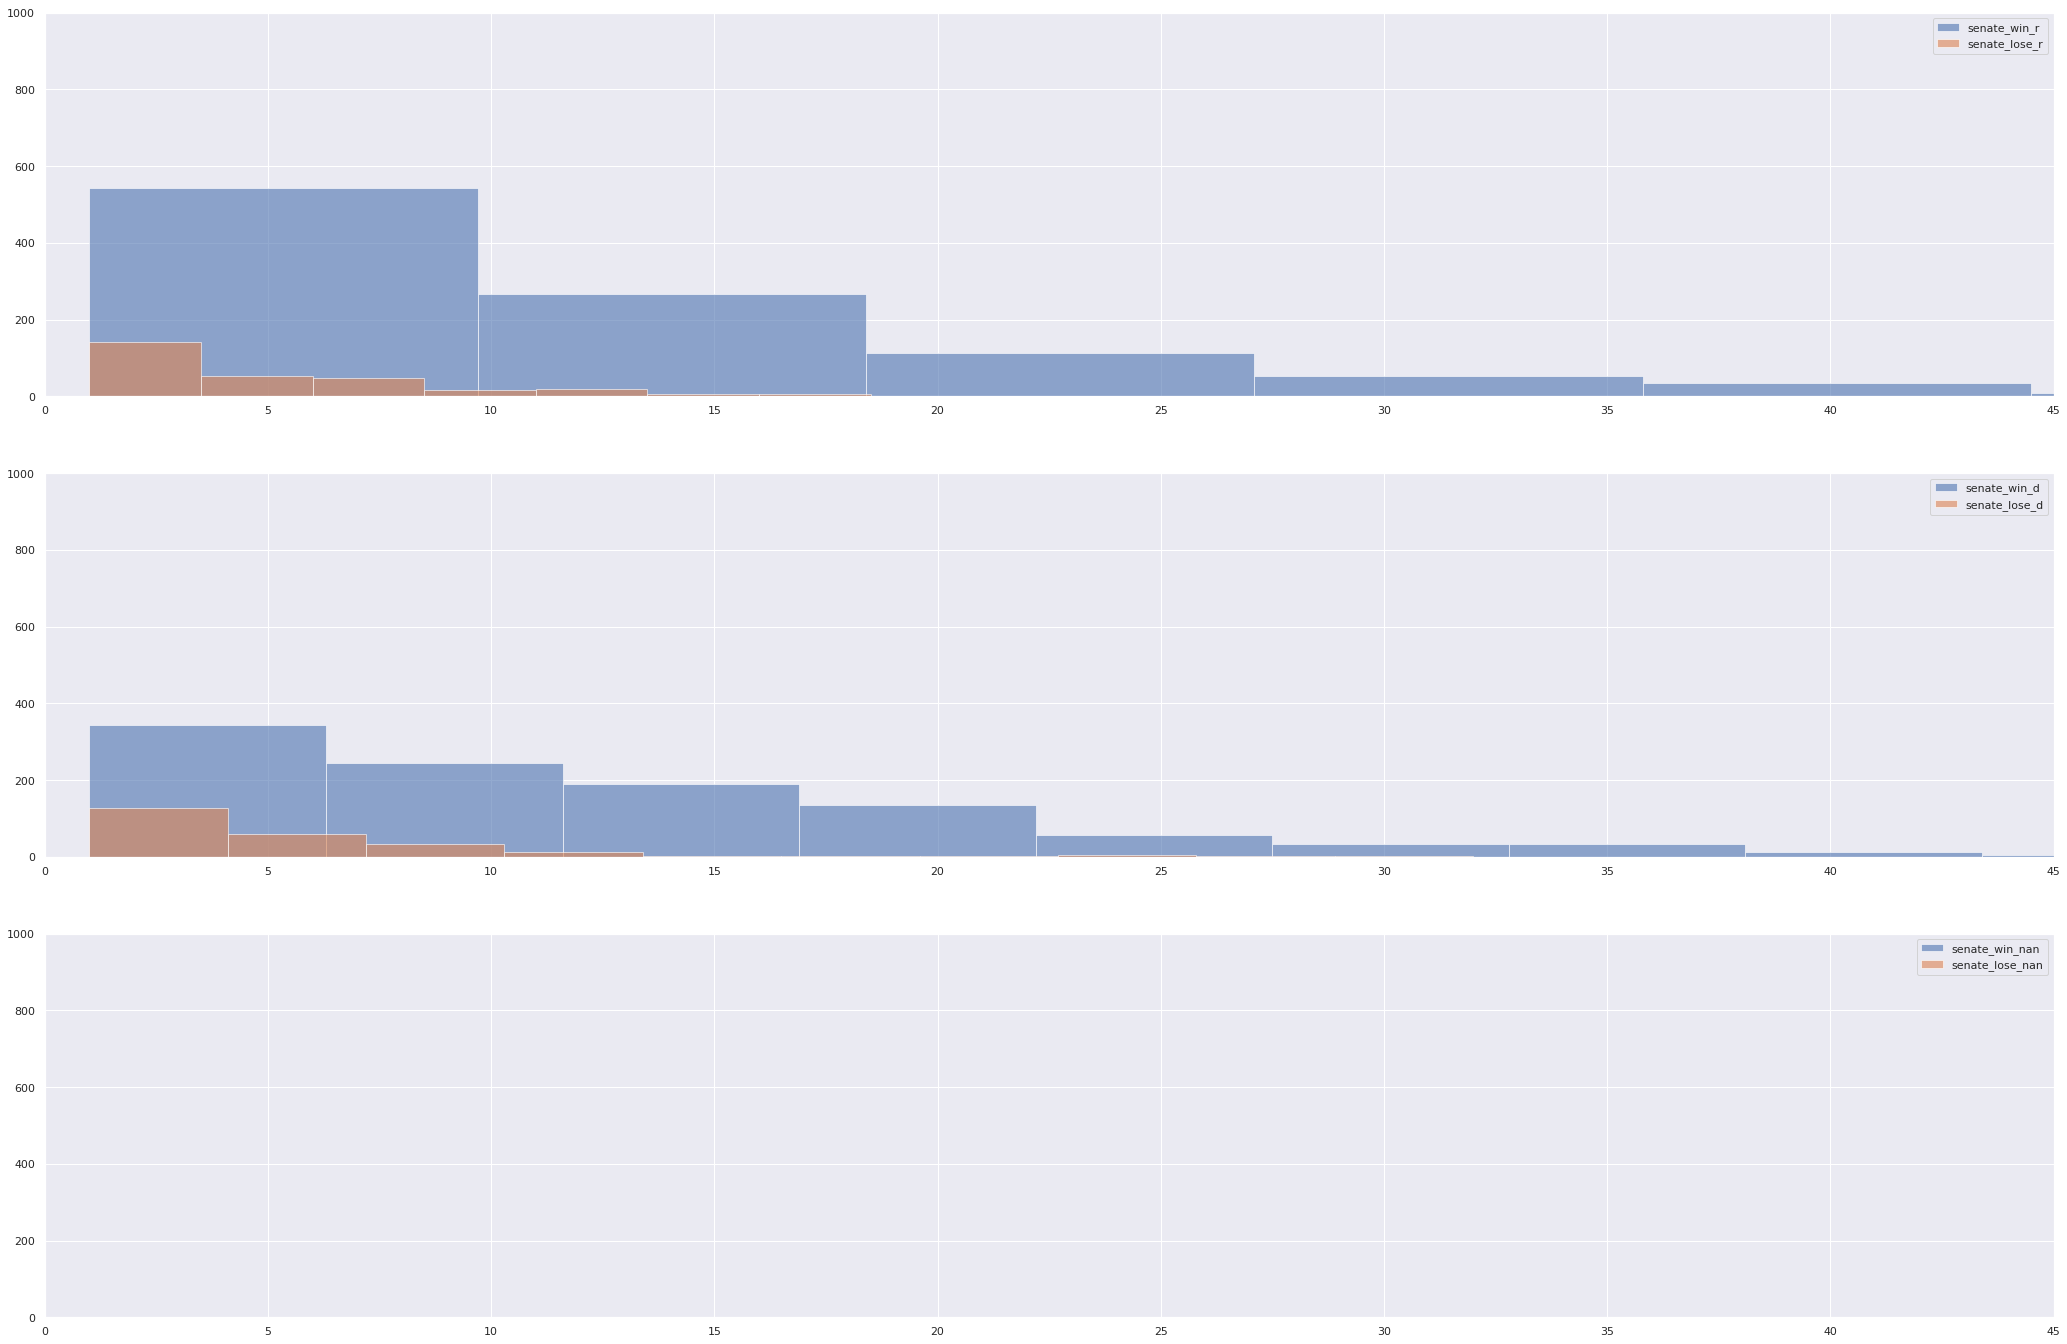

In [50]:
plt.figure(figsize=(36, 24))

plt.subplot(311)
plt.hist(senate_win_r['poll_spread'], label='senate_win_r', alpha=0.6) # republican led poll and won
plt.hist(senate_lose_r['poll_spread'], label='senate_lose_r', alpha=0.6) # republican lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend()

plt.subplot(312)
plt.hist(senate_win_d['poll_spread'], label='senate_win_d', alpha=0.6) # democrat led poll and won
plt.hist(senate_lose_d['poll_spread'], label='senate_lose_d', alpha=0.6) # democrat lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend()

plt.subplot(313)
plt.hist(senate_win_nan['poll_spread'], label='senate_win_nan', alpha=0.6)
plt.hist(senate_lose_nan['poll_spread'], label='senate_lose_nan', alpha=0.6)
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend();


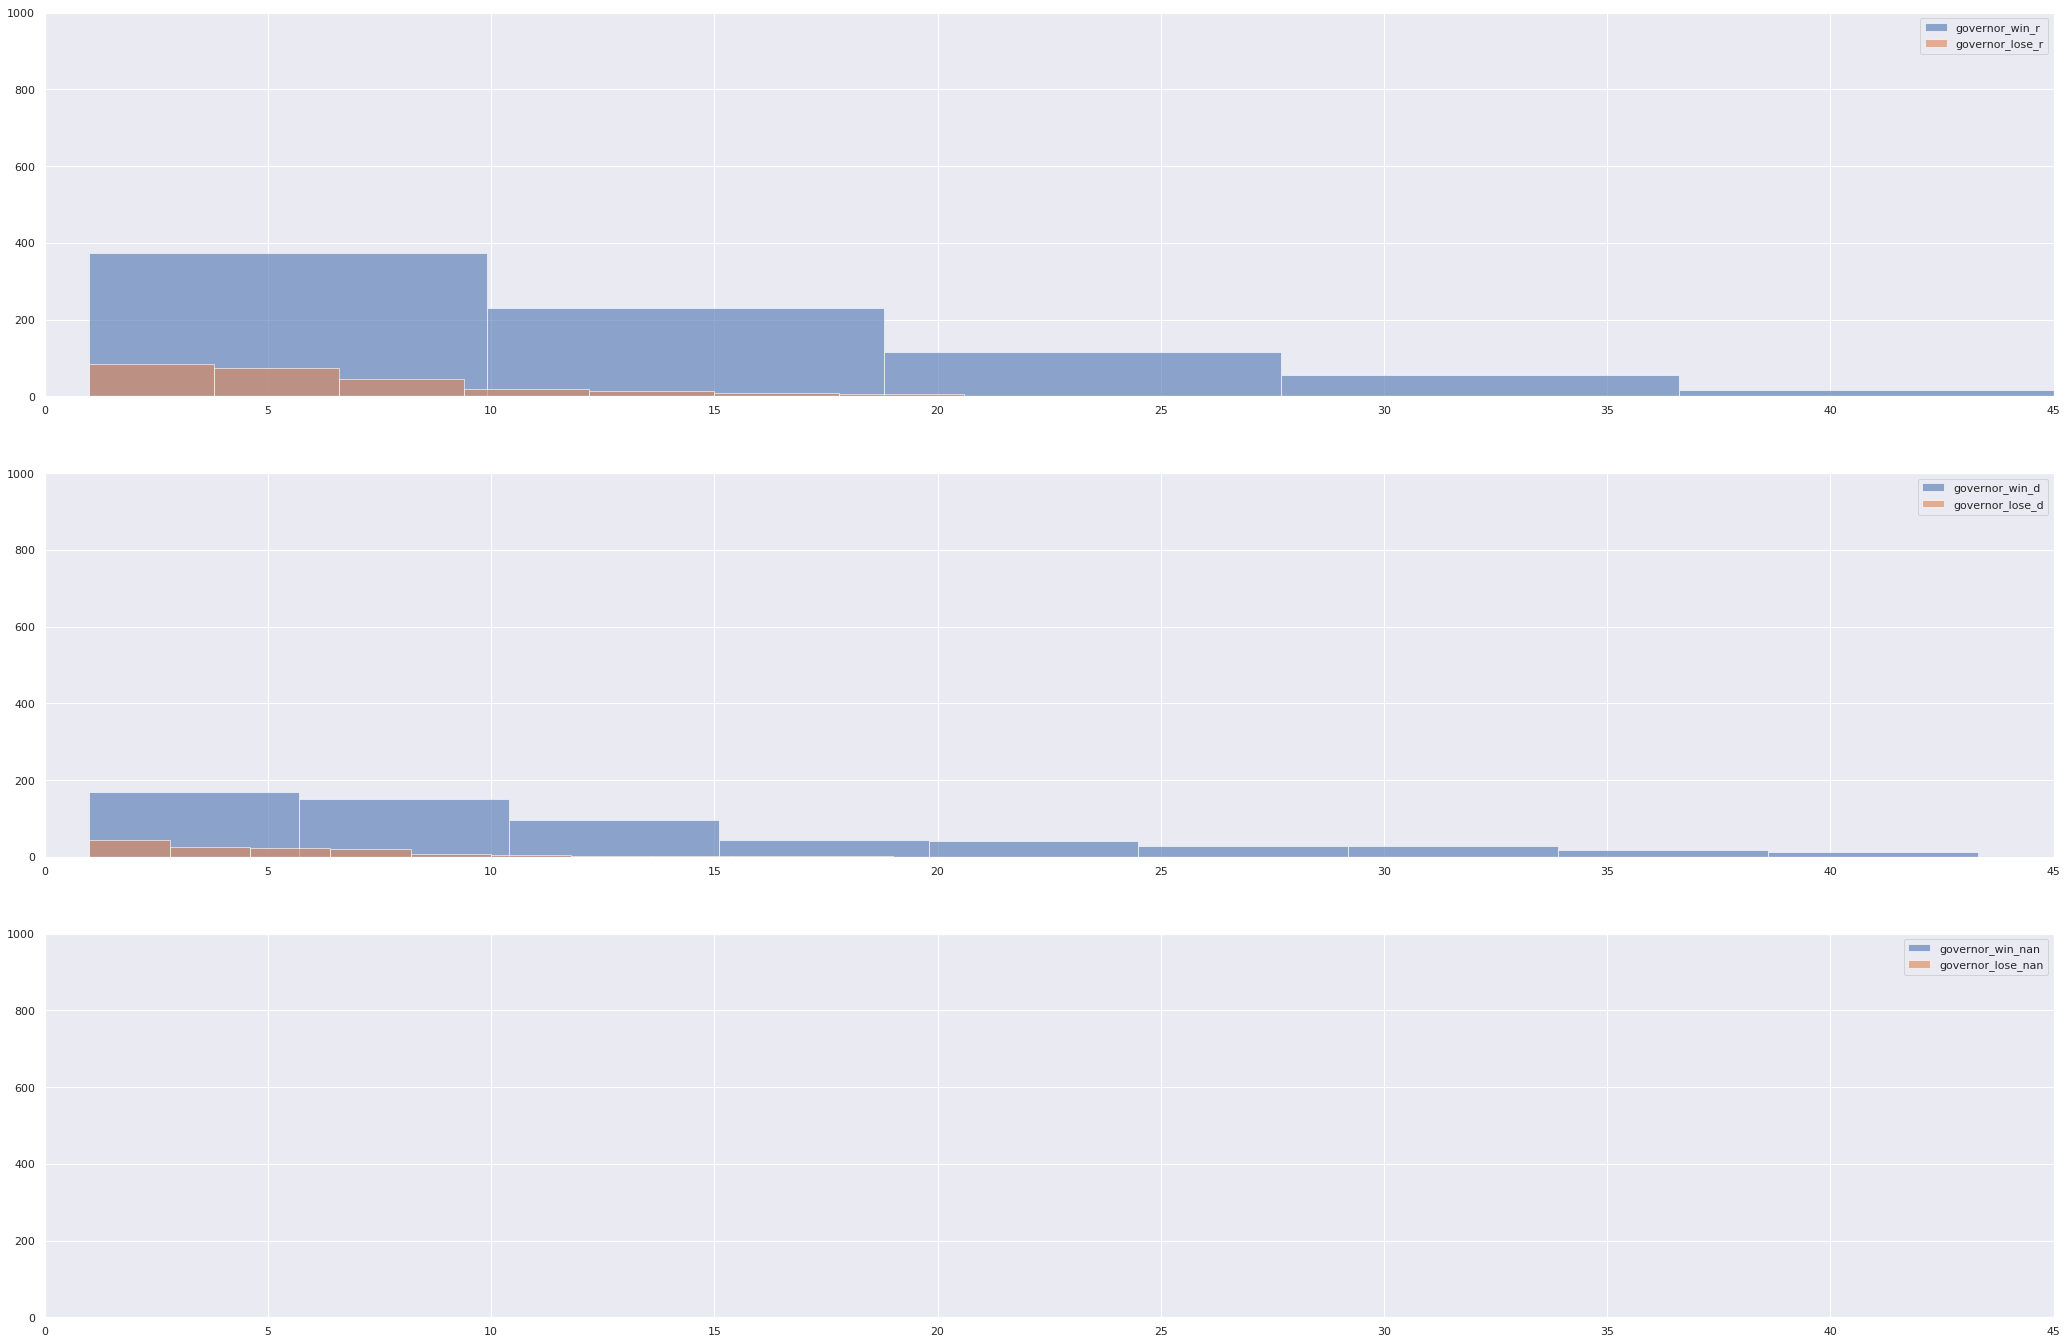

In [51]:
plt.figure(figsize=(36, 24))

plt.subplot(311)
plt.hist(governor_win_r['poll_spread'], label='governor_win_r', alpha=0.6) # republican led poll and won
plt.hist(governor_lose_r['poll_spread'], label='governor_lose_r', alpha=0.6) # republican lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend()

plt.subplot(312)
plt.hist(governor_win_d['poll_spread'], label='governor_win_d', alpha=0.6) # democrat led poll and won
plt.hist(governor_lose_d['poll_spread'], label='governor_lose_d', alpha=0.6) # democrat lost poll but won
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend()

plt.subplot(313)
plt.hist(governor_win_nan['poll_spread'], label='governor_win_nan', alpha=0.6)
plt.hist(governor_lose_nan['poll_spread'], label='governor_lose_nan', alpha=0.6)
plt.xlim(0, 45)
plt.ylim(0, 1000)
plt.legend();


# Load PredictIt Data

In [4]:
df = pd.read_csv('DailyMarketData_Fixed.csv',sep = '|')
df.head(5)

,MarketId,MarketName,MarketSymbol,ContractName,ContractSymbol,Date,OpenPrice,LowPrice,HighPrice,ClosePrice,Volume
0,1234,Who will win the 2016 U.S. presidential election?,USPREZ16,Ben Carson,CARSON.USPREZ16,2015-06-02,0.07,0.07,0.07,0.07,25
1,1234,Who will win the 2016 U.S. presidential election?,USPREZ16,Ben Carson,CARSON.USPREZ16,2015-06-03,0.07,0.07,0.07,0.07,0
2,1234,Who will win the 2016 U.S. presidential election?,USPREZ16,Ben Carson,CARSON.USPREZ16,2015-06-04,0.07,0.07,0.07,0.07,0
3,1234,Who will win the 2016 U.S. presidential election?,USPREZ16,Ben Carson,CARSON.USPREZ16,2015-06-05,0.07,0.07,0.07,0.07,0
4,1234,Who will win the 2016 U.S. presidential election?,USPREZ16,Ben Carson,CARSON.USPREZ16,2015-06-06,0.07,0.07,0.07,0.07,0


# How many markets we have and how many observations we have for each market?

In [12]:
markets = df['MarketId'].unique()
markets

array([1234, 1296, 1301, 1303, 1322, 1323, 1324, 1325, 1406, 1473, 1866,
       1920, 1998, 2015, 2029, 2052, 2099, 2100, 2101, 2102, 2103, 2112,
       2113, 2114, 2115, 2116, 2119, 2120, 2132, 2133, 2134, 2135, 2136,
       2138, 2139, 2173, 2174, 2196, 2201, 2202, 2219, 2220, 2230, 2233,
       2254, 2269, 2270, 2280, 2281, 2290, 2291, 2293, 2294, 2310, 2311,
       2336, 2339, 2340, 2341, 2342, 2355, 2356, 2357, 2370, 2373, 2374,
       2375, 2376, 2380, 2391, 2392, 2393, 2394, 2401, 2402, 2406, 2416,
       2417, 2418, 2419, 2431, 2432, 2436, 2437, 2438, 2439, 2605, 2631,
       2639, 2647, 2654, 2691, 2692, 2693, 2694, 2736, 2739, 2775, 2776,
       2777, 2778, 2779, 2792, 2793, 2794, 2795, 2896, 2924, 2926, 2932,
       2961, 3070, 3170, 3185, 3220, 3298, 3299, 3369, 3471, 3472, 3498,
       3499, 3582, 3583, 3584, 3766, 3783, 3827, 3868, 3873, 3874, 3899,
       3903, 3904, 3922, 3953, 3966, 4051, 4147, 4148, 4273, 4370, 4371,
       4372, 4373, 4473])

In [14]:
print('Numbers of markets in PredictIt Data:', len(markets))

Numbers of markets in PredictIt Data: 146


In [15]:
df_id = pd.DataFrame(df['MarketId'].value_counts())
df_id.columns = ['# of Observation']
df_id.index.names = ['Market ID']
print('Markets with the most observations:')
df_id.head()

Markets with the most observations:


,# of Observation
Market ID,
1234,21237
2406,7154
2779,2140
2777,2068
1296,2026


# Histogram

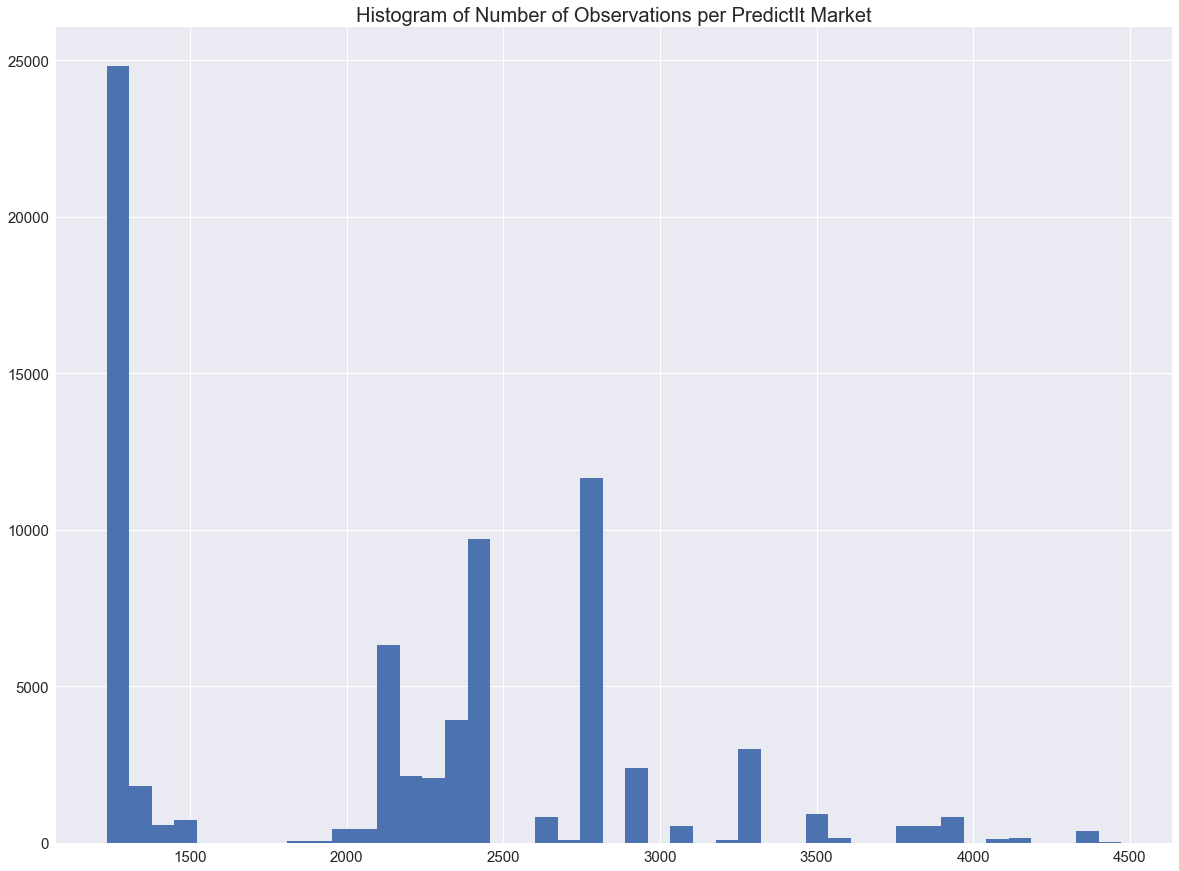

In [21]:
marketid = df['MarketId']
plt.figure(figsize=(20, 15))
pd.Series.hist(marketid, bins='auto',align='mid')
#plt.bar(rate['index'],rate['MarketId'])
plt.title("Histogram of Number of Observations per PredictIt Market", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("hist.png")
plt.show()

In [49]:
numofmarket = len(df_id)
observation = sum(df_id['# of Observation'])
top7percentage = sum(df_id.head(6)['# of Observation']) /  sum(df_id['# of Observation'])
print('Total numbers of markets in PredictIt Data: ', numofmarket)
print('Total numbers of observations in PredictIt Data: ', observation)
print('Percentage of the 6 markets with most numbers of observations among all observations : ', top7percentage)

Total numbers of markets in PredictIt Data:  146
Total numbers of observations in PredictIt Data:  75337
Percentage of the 6 markets with most numbers of observations among all observations :  0.48374636632730267


There are 146 diiferent markets in the PredictIt data with 146 and total 75337 different observations; however, almost 50% of them are in 6 markets.

# Load RCP Direction Data

In [65]:
direction = pd.read_csv('RCP_direction_final_538.csv')
direction.head()

,Unnamed: 0,Race/Topic (Click to Sort),Poll,Results,Spread,Date,Year,score
0,0,Direction of Country,R2000/Daily Kos (D),"Right Direction 38, Wrong Track 58",-20,2010-04-16,2010,0.0
1,1,Direction of Country,R2000/Daily Kos (D),"Right Direction 39, Wrong Track 57",-18,2010-04-23,2010,0.0
2,2,Direction of Country,Rasmussen Reports,"Right Direction 33, Wrong Track 62",-29,2010-04-26,2010,7.0
3,3,Direction of Country,Democracy Corps (D),"Right Direction 34, Wrong Track 57",-23,2010-04-27,2010,8.0
4,4,Direction of Country,Rasmussen Reports,"Right Direction 33, Wrong Track 61",-28,2010-04-27,2010,7.0


# How often the poll would result in 'Right Track', 'Wrong Track', and 'Tie'?

In [66]:
direction = direction[['Date','Spread']]
direction = direction.groupby(['Date'])['Spread'].mean().reset_index()
direction['Date'] = pd.to_datetime(direction['Date'])
direction.set_index(['Date'],inplace=True)

In [104]:
right = sum(direction['Spread'] > 0)
wrong = sum(direction['Spread'] < 0)
tie = sum(direction['Spread'] == 0)
total = len(direction)
print('Total numbers of poll: ', total)
print('Percentage of Right Track: ', right/total)
print('Percentage of Wrong Track: ', wrong/ total)
print('Percentage of Tie: ', tie/total)

Total numbers of poll:  1010
Percentage of Right Track:  0.0
Percentage of Wrong Track:  0.999009900990099
Percentage of Tie:  0.0009900990099009901


In the poll data we have for the country direction, we have 1010 observations. 1099 of them have a result in 'Wrong Track', 1 of them is 'Tie', and None of the observations is 'Right Track'.

# Plot of the Spread on the Poll of Country Direction

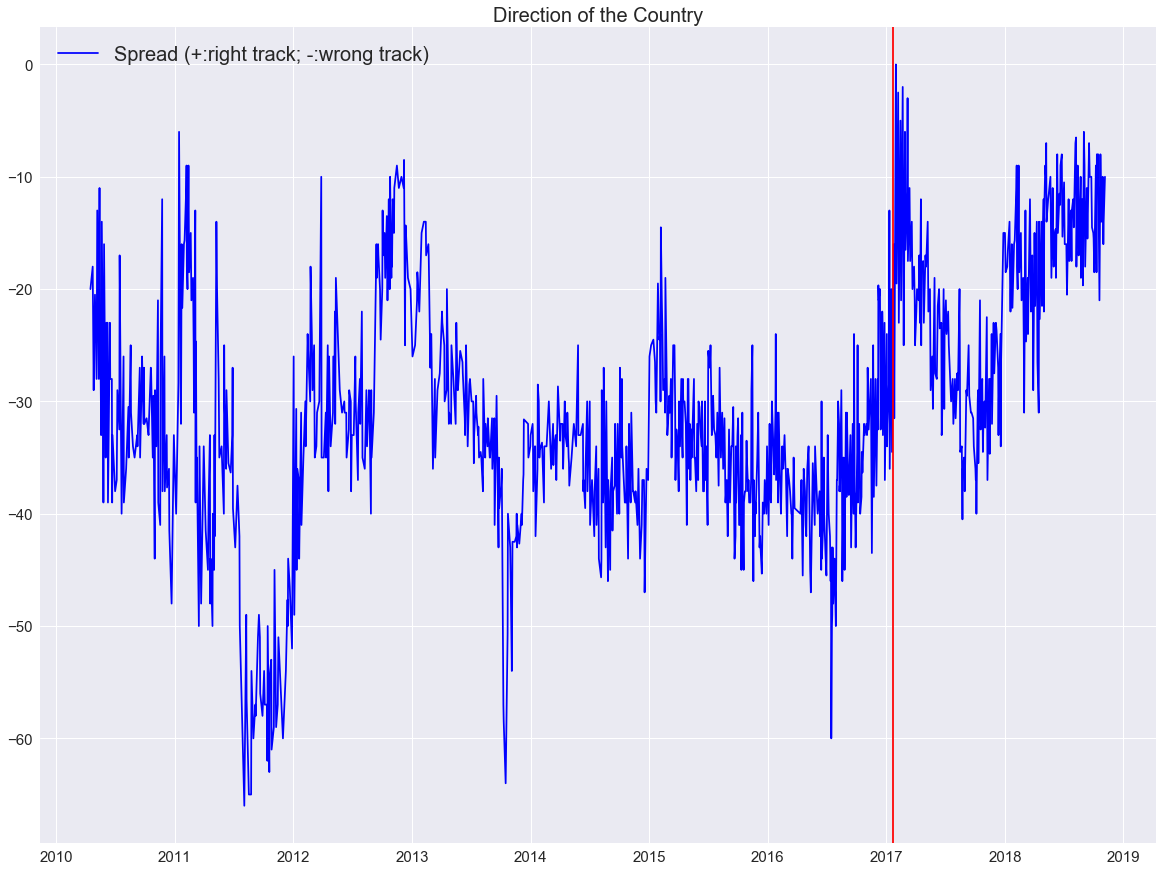

In [105]:
plt.figure(figsize=(20, 15))
direction_plot = plt.plot(direction, data=df,color = 'blue')
plt.axvline(x='2017-01-20',color='red')
direction_l = plt.legend(direction_plot,prop={'size': 20})
direction_l.get_texts()[0].set_text('Spread (+:right track; -:wrong track)')
plt.title("Direction of the Country",fontsize = 20)
#axes = plt.gca()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The red vertical line repesents the date when Donald Trump Inaugurate

# Load RCP Generic Congressional Vote Data

In [118]:
plt.figure(figsize=(20, 15))
generic = pd.read_csv('RCP_generic_final_538.csv')
generic.head()

,Unnamed: 0,Race/Topic (Click to Sort),Poll,Results,Spread,Date,Year,score
0,0,Generic Congressional Vote,PPP (D),"Republicans 47, Democrats 42",-5,2010-04-16,2010,9.0
1,1,Generic Congressional Vote,Gallup,"Republicans 46, Democrats 43",-3,2010-04-19,2010,9.0
2,2,Generic Congressional Vote,Rasmussen Reports,"Republicans 46, Democrats 36",-10,2010-04-19,2010,7.0
3,3,Generic Congressional Vote,FOX News,"Republicans 42, Democrats 38",-4,2010-04-22,2010,12.0
4,4,Generic Congressional Vote,Rasmussen Reports,"Republicans 44, Democrats 38",-6,2010-04-26,2010,7.0


# In the poll data of generic congressional vote, how often would Republicans get more votes than Democrats?

In [119]:
generic = generic[['Date','Spread']]
generic = generic.groupby(['Date'])['Spread'].mean().reset_index()
generic['Date'] = pd.to_datetime(generic['Date'])

In [120]:
dem = sum(generic['Spread'] > 0)
rep = sum(generic['Spread'] < 0)
tie = sum(generic['Spread'] == 0)
total = len(generic)
print('Total numbers of observations: ', total)
print('Percentage of Republicans Get more: ', rep/total)
print('Percentage of Democrats Get more: ', dem/ total)
print('Percentage of Tie: ', tie/total)

Total numbers of observations:  606
Percentage of Republicans Get more:  0.33828382838283827
Percentage of Democrats Get more:  0.594059405940594
Percentage of Tie:  0.06765676567656766


In the poll data we have for the generic congressional vote, we have 859 observations. 541 of them have a result in Republicans get more votes, 258 of them result in Democrats get more votes, and 60 of the observations are tie.

# Plot of the Spread on the Poll of Generic Congressional Vote

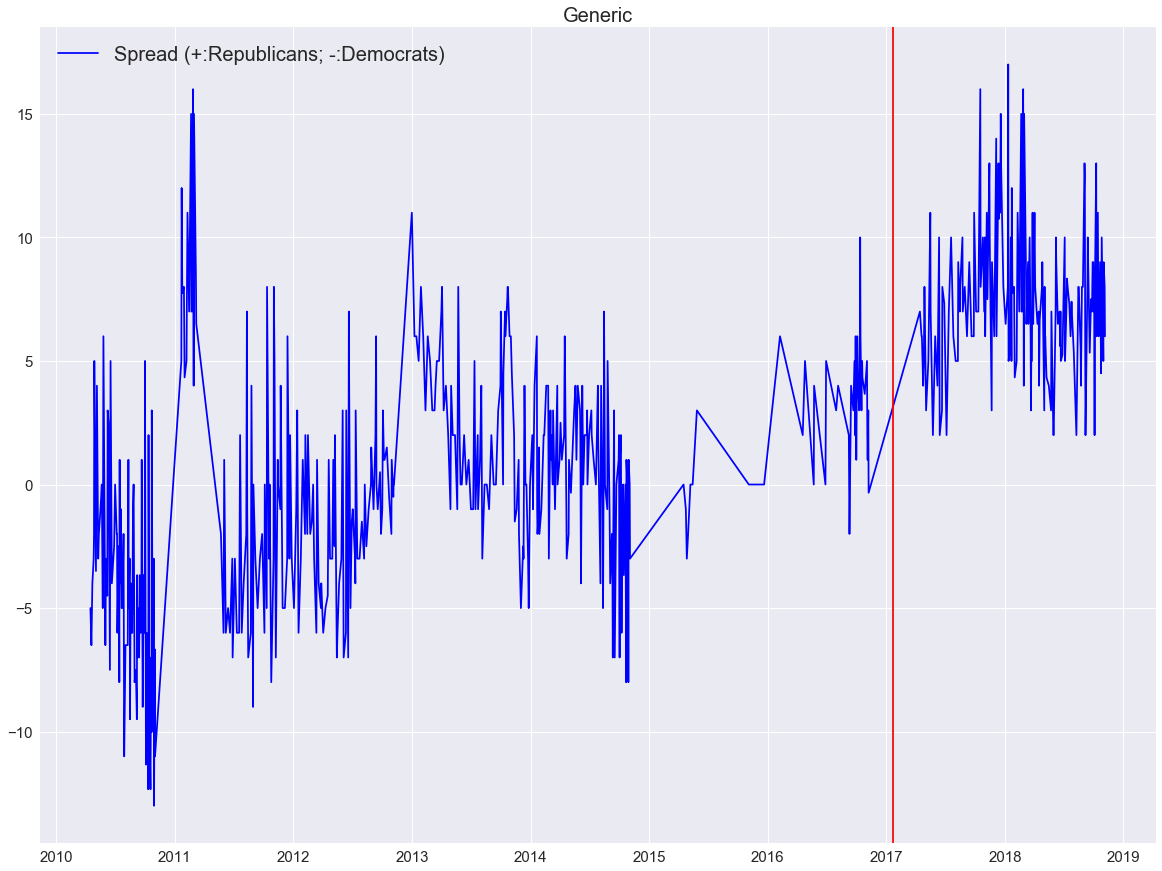

In [125]:
plt.figure(figsize=(20, 15))
generic_plot = plt.plot(generic, data=df,color = 'blue')
plt.axvline(x='2017-01-20',color='red')
generic_l = plt.legend(generic_plot, prop={'size': 20})
generic_l.get_texts()[0].set_text('Spread (+:Republicans; -:Democrats)')

plt.title("Generic",fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The red vertical line repesents the when date Donald Trump Inaugurates

# Load RCP Presidential Approval Poll Data

In [132]:
p_approval = pd.read_csv('RCP_p_approval_final_538.csv')
p_approval.head()

,Unnamed: 0,Race/Topic (Click to Sort),Poll,Results,Spread,Date,Year,score
0,0,President Obama Job Approval,Quinnipiac,"Approve 44, Disapprove 46",-2,2010-04-21,2010,11.0
1,1,President Obama Job Approval,FOX News,"Approve 46, Disapprove 46",0,2010-04-22,2010,12.0
2,2,President Obama Job Approval,Gallup,"Approve 50, Disapprove 43",7,2010-04-25,2010,9.0
3,3,President Obama Job Approval,Rasmussen Reports,"Approve 45, Disapprove 54",-9,2010-04-25,2010,7.0
4,4,President Obama Job Approval,Democracy Corps (D),"Approve 48, Disapprove 46",2,2010-04-27,2010,8.0


# In the poll data of presidential approval, how often would approval gets?

In [133]:
p_approval = p_approval[['Date','Spread']]
p_approval = p_approval.groupby(['Date'])['Spread'].mean().reset_index()
p_approval['Date'] = pd.to_datetime(p_approval['Date'])
p_approval.set_index(['Date'],inplace=True)
App = sum(p_approval['Spread'] > 0)
Disapp = sum(p_approval['Spread'] < 0)
tie = sum(p_approval['Spread'] == 0)
total = len(p_approval)
print('Total numbers of observations: ', total)
print('Percentage of Approval Gets more: ', App/total)
print('Percentage of Disapproval Gets more: ', Disapp/ total)
print('Percentage of Tie: ', tie/total)

Total numbers of observations:  1152
Percentage of Approval Gets more:  0.24479166666666666
Percentage of Disapproval Gets more:  0.7256944444444444
Percentage of Tie:  0.029513888888888888


In the poll data we have for the presidential approval, we have 1152 observations. 282 of them have a result in approval gets more votes, 836 of them result in disapproval more votes, and 34 of the observations are tie.

# Plot of the Spread on the Poll of Presidential Approval

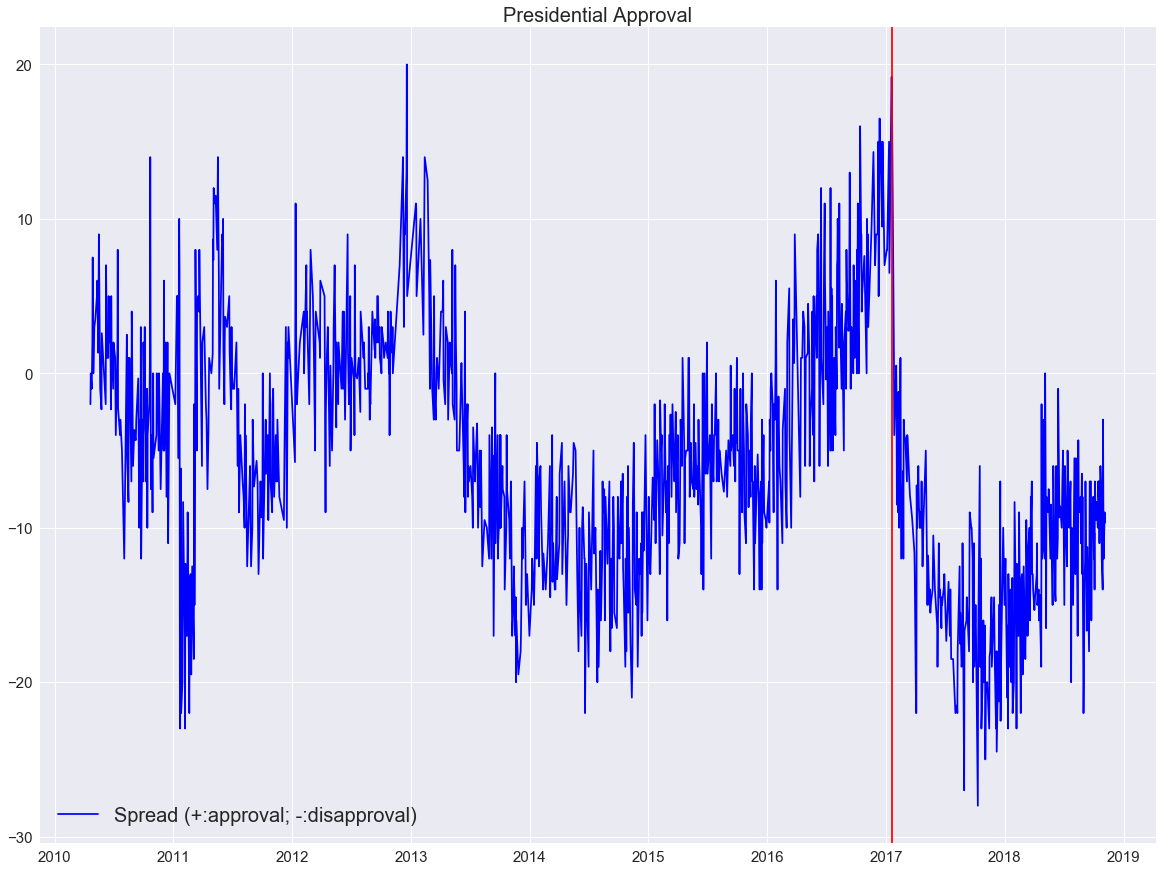

In [143]:
plt.figure(figsize=(20, 15))
p_approval_plot = plt.plot(p_approval, data=df,color = 'blue')
trump = plt.axvline(x='2017-01-20',color='red')
p_approval_l = plt.legend(p_approval_plot,prop={'size': 20})
p_approval_l.get_texts()[0].set_text('Spread (+:approval; -:disapproval)')
plt.title("Presidential Approval",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("p_approval.png")
#plt.savefig("p_approval.svg", format="svg")
plt.show()

The red vertical line repesents the when date Donald Trump Inaugurates

# Load RCP Congressional Job Approval Poll Data

In [147]:
c_approval = pd.read_csv('RCP_c_approval_final_538.csv')
c_approval.head()

,Unnamed: 0,Race/Topic (Click to Sort),Poll,Results,Spread,Date,Year,score
0,0,Congressional Job Approval,Quinnipiac,"Approve 20, Disapprove 71",-51,2010-04-21,2010,11.0
1,1,Congressional Job Approval,FOX News,"Approve 22, Disapprove 68",-46,2010-04-22,2010,12.0
2,2,Congressional Job Approval,NBC News/Wall St. Jrnl,"Approve 21, Disapprove 72",-51,2010-05-12,2010,11.0
3,3,Congressional Job Approval,Gallup,"Approve 21, Disapprove 75",-54,2010-05-14,2010,9.0
4,4,Congressional Job Approval,Associated Press/GfK,"Approve 28, Disapprove 71",-43,2010-05-15,2010,9.0


# In the poll data of congressional job approval, how often would approval gets?

In [148]:
c_approval = pd.read_csv('RCP_c_approval_final_538.csv')
c_approval = c_approval[['Date','Spread']]
c_approval = c_approval.groupby(['Date'])['Spread'].mean().reset_index()
c_approval['Date'] = pd.to_datetime(c_approval['Date'])
c_approval.set_index(['Date'],inplace=True)
App = sum(c_approval['Spread'] > 0)
Disapp = sum(c_approval['Spread'] < 0)
tie = sum(c_approval['Spread'] == 0)
total = len(c_approval)
print('Total numbers of observations: ', total)
print('Percentage of Approval Gets more: ', App/total)
print('Percentage of Disapproval Gets more: ', Disapp/ total)
print('Percentage of Tie: ', tie/total)

Total numbers of observations:  573
Percentage of Approval Gets more:  0.0
Percentage of Disapproval Gets more:  1.0
Percentage of Tie:  0.0


In the poll data we have for the presidential approval, we have 573 observations, and all of them have a result in disapproval gets more votes.

# Plot of the Spread on the Poll of Congressional Job Approval

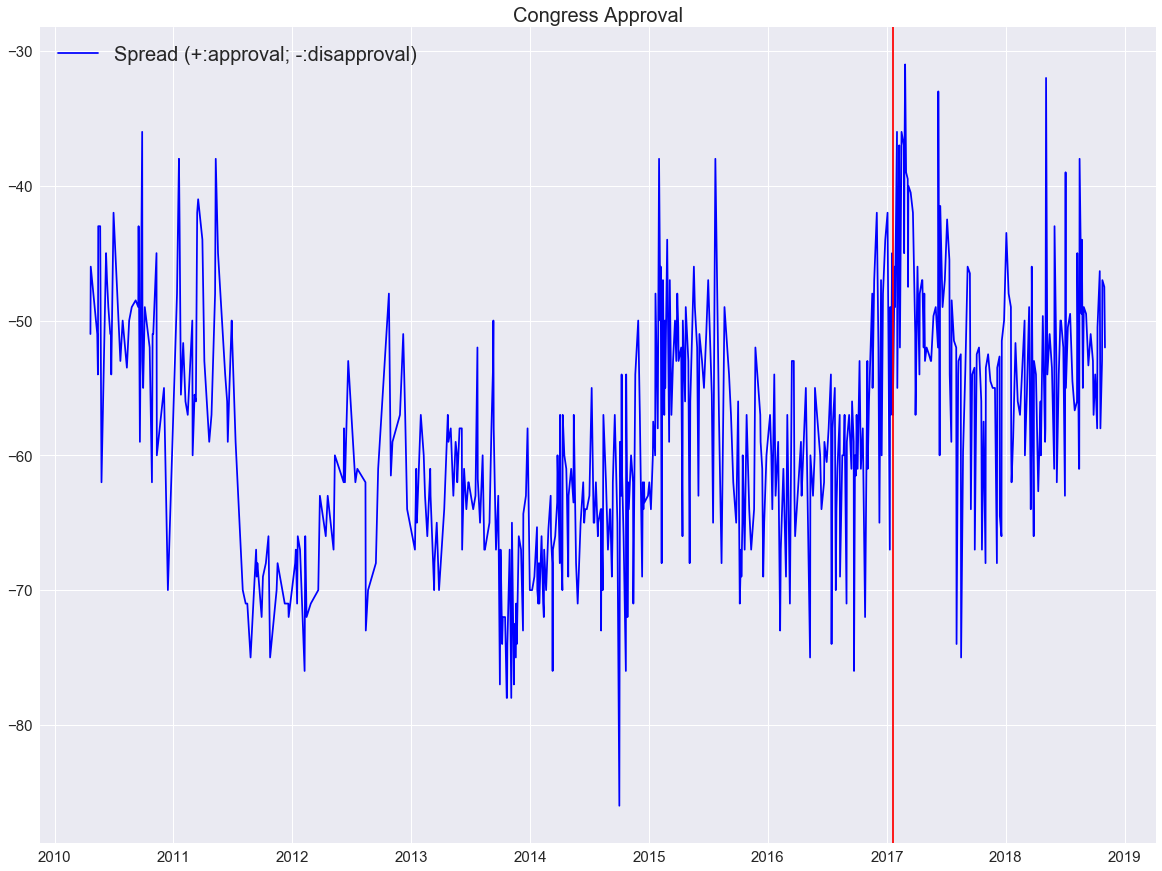

In [151]:
plt.figure(figsize=(20, 15))
c_approval = pd.read_csv('RCP_c_approval_final_538.csv')
c_approval = c_approval[['Date','Spread']]
c_approval = c_approval.groupby(['Date'])['Spread'].mean().reset_index()
c_approval['Date'] = pd.to_datetime(c_approval['Date'])
c_approval.set_index(['Date'],inplace=True)
c_approval_plot = plt.plot(c_approval, data=df, color = 'blue', label="congress approval")
trump = plt.axvline(x='2017-01-20',color='red',label="trump")
c_approval_l = plt.legend(c_approval_plot,prop={'size': 20})
c_approval_l.get_texts()[0].set_text('Spread (+:approval; -:disapproval)')
plt.title("Congress Approval",fontsize= 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("c_approval.png")
plt.show()

The red vertical line repesents the when date Donald Trump Inaugurates